In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB

sns.set()
df = pd.read_csv('oasis_longitudinal.csv')
df = df.loc[df['Visit']==1] # filters the DataFrame to include only the data from the first visit
df = df.reset_index(drop=True) # resets the index of the DataFrame after filtering the data in the previous step.

df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # Replace M,F with 0 and 1
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Renaming Converted to Demanted
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) #Assign 1 for demanted and 0 for demanted patient


df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

pd.isnull(df).sum() # check for missing values (NaN or None) in each column of the DataFrame
df_dropna = df.dropna(axis=0, how='any') #axis=0 -> Drop the row, how=any -> Even if a row has 1 missing value drop the row
pd.isnull(df_dropna).sum()

df_dropna['Group'].value_counts()

acc = []


# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y,test_size=0.3,random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)

X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

# NAIVE BAYES
clf = GaussianNB()
clf.fit(X_trainval_dna,Y_trainval_dna)

x=clf.predict(X_test_dna)

score=clf.score(X_test_dna,Y_test_dna)
auc = metrics.roc_auc_score(Y_test_dna, x)

print(auc)
m = 'Naive Bayes'
acc.append([m, score,auc])


# #Making confusion matrix
# cm = confusion_matrix(Y_test_dna, x)
# cm_display = ConfusionMatrixDisplay(cm).plot()

# ax = plt.gca()
# rfc_disp = RocCurveDisplay.from_estimator(clf, X_test_dna,Y_test_dna)
# plt.show()



FileNotFoundError: ignored

# EXPLORATORY DATA ANALYSIS  📊

Text(0.5, 1.0, 'Gender and Demented rate')

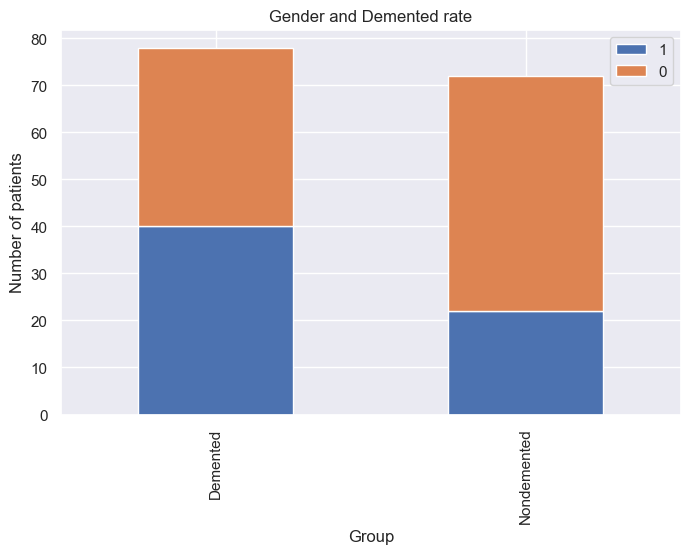

In [ ]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

Text(0.5, 1.0, 'Distribution of nWBV by Group')

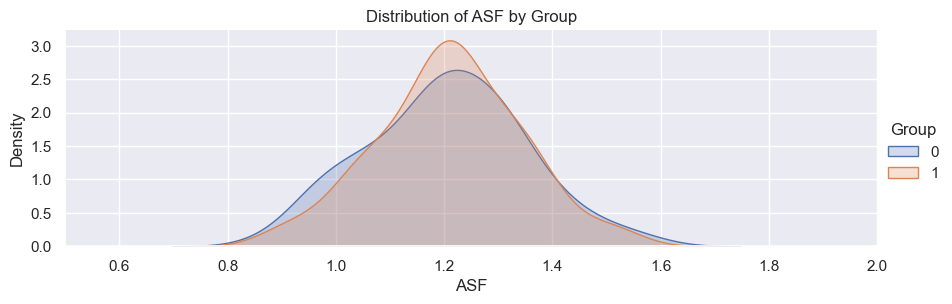

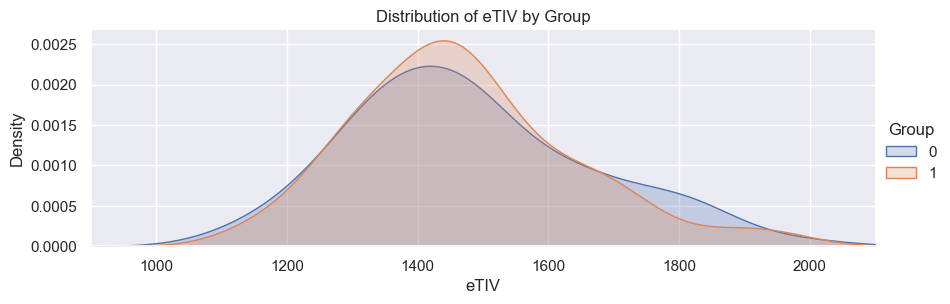

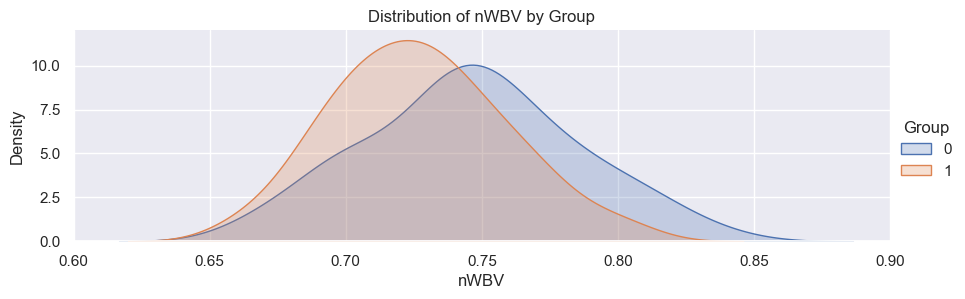

In [ ]:
# Create a FacetGrid for ASF feature with Group (Demented and Nondemented) as the hue
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'ASF', fill=True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)
plt.title("Distribution of ASF by Group")

# Create a FacetGrid for eTIV feature with Group (Demented and Nondemented) as the hue
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'eTIV', fill=True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)
plt.title("Distribution of eTIV by Group")

# Create a FacetGrid for nWBV feature with Group (Demented and Nondemented) as the hue
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'nWBV', fill=True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6, 0.9)
plt.title("Distribution of nWBV by Group")


### 📌 ASF, eTIV, nWBV


###### ASF (Atlas Scaling Factor): This is a measure of the brain size, calculated as the ratio of the brain volume to the expected brain size based on age and gender.

###### eTIV (Estimated Total Intracranial Volume): This is the estimated total volume of the brain, including the cerebrum, cerebellum, and brainstem.

###### nWBV (Normalized Whole Brain Volume): This is the ratio of the whole brain volume to the intracranial volume. It is used to normalize the brain volume data for the individual differences in head size.

### 📌 Scatter plot to help us identify patterns or trends in the relationship between age and cognitive function in the dataset.

<AxesSubplot: xlabel='Age', ylabel='Count'>

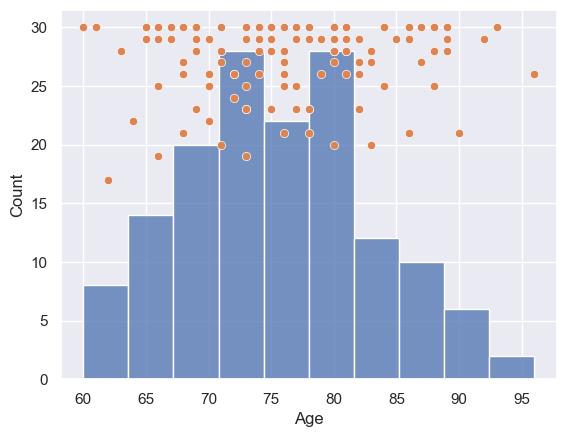

In [ ]:
# Visualize the data
sns.histplot(df['Age'])
sns.scatterplot(x='Age', y='MMSE', data=df)

### 📌 No of demented and non demented patients


Group
1    78
0    72
Name: count, dtype: int64


<AxesSubplot: xlabel='Group', ylabel='count'>

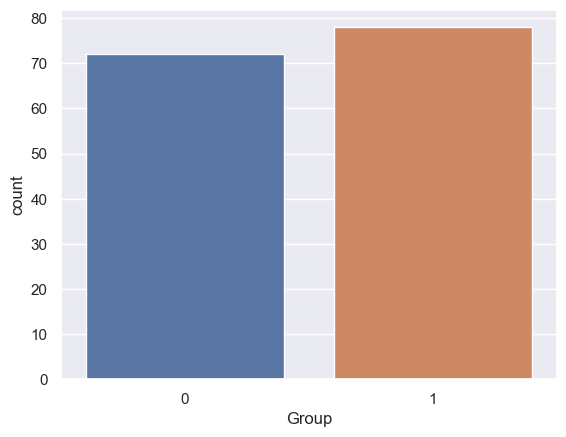

In [ ]:
print(df['Group'].value_counts()) #number of samples in each class (Demented and Non-Demented) in the target variable.
sns.countplot(x='Group', data=df) #bar plot to visualize the class distribution in the target variable.

### 📌 Pair plot to visualize the relationship between different parameters

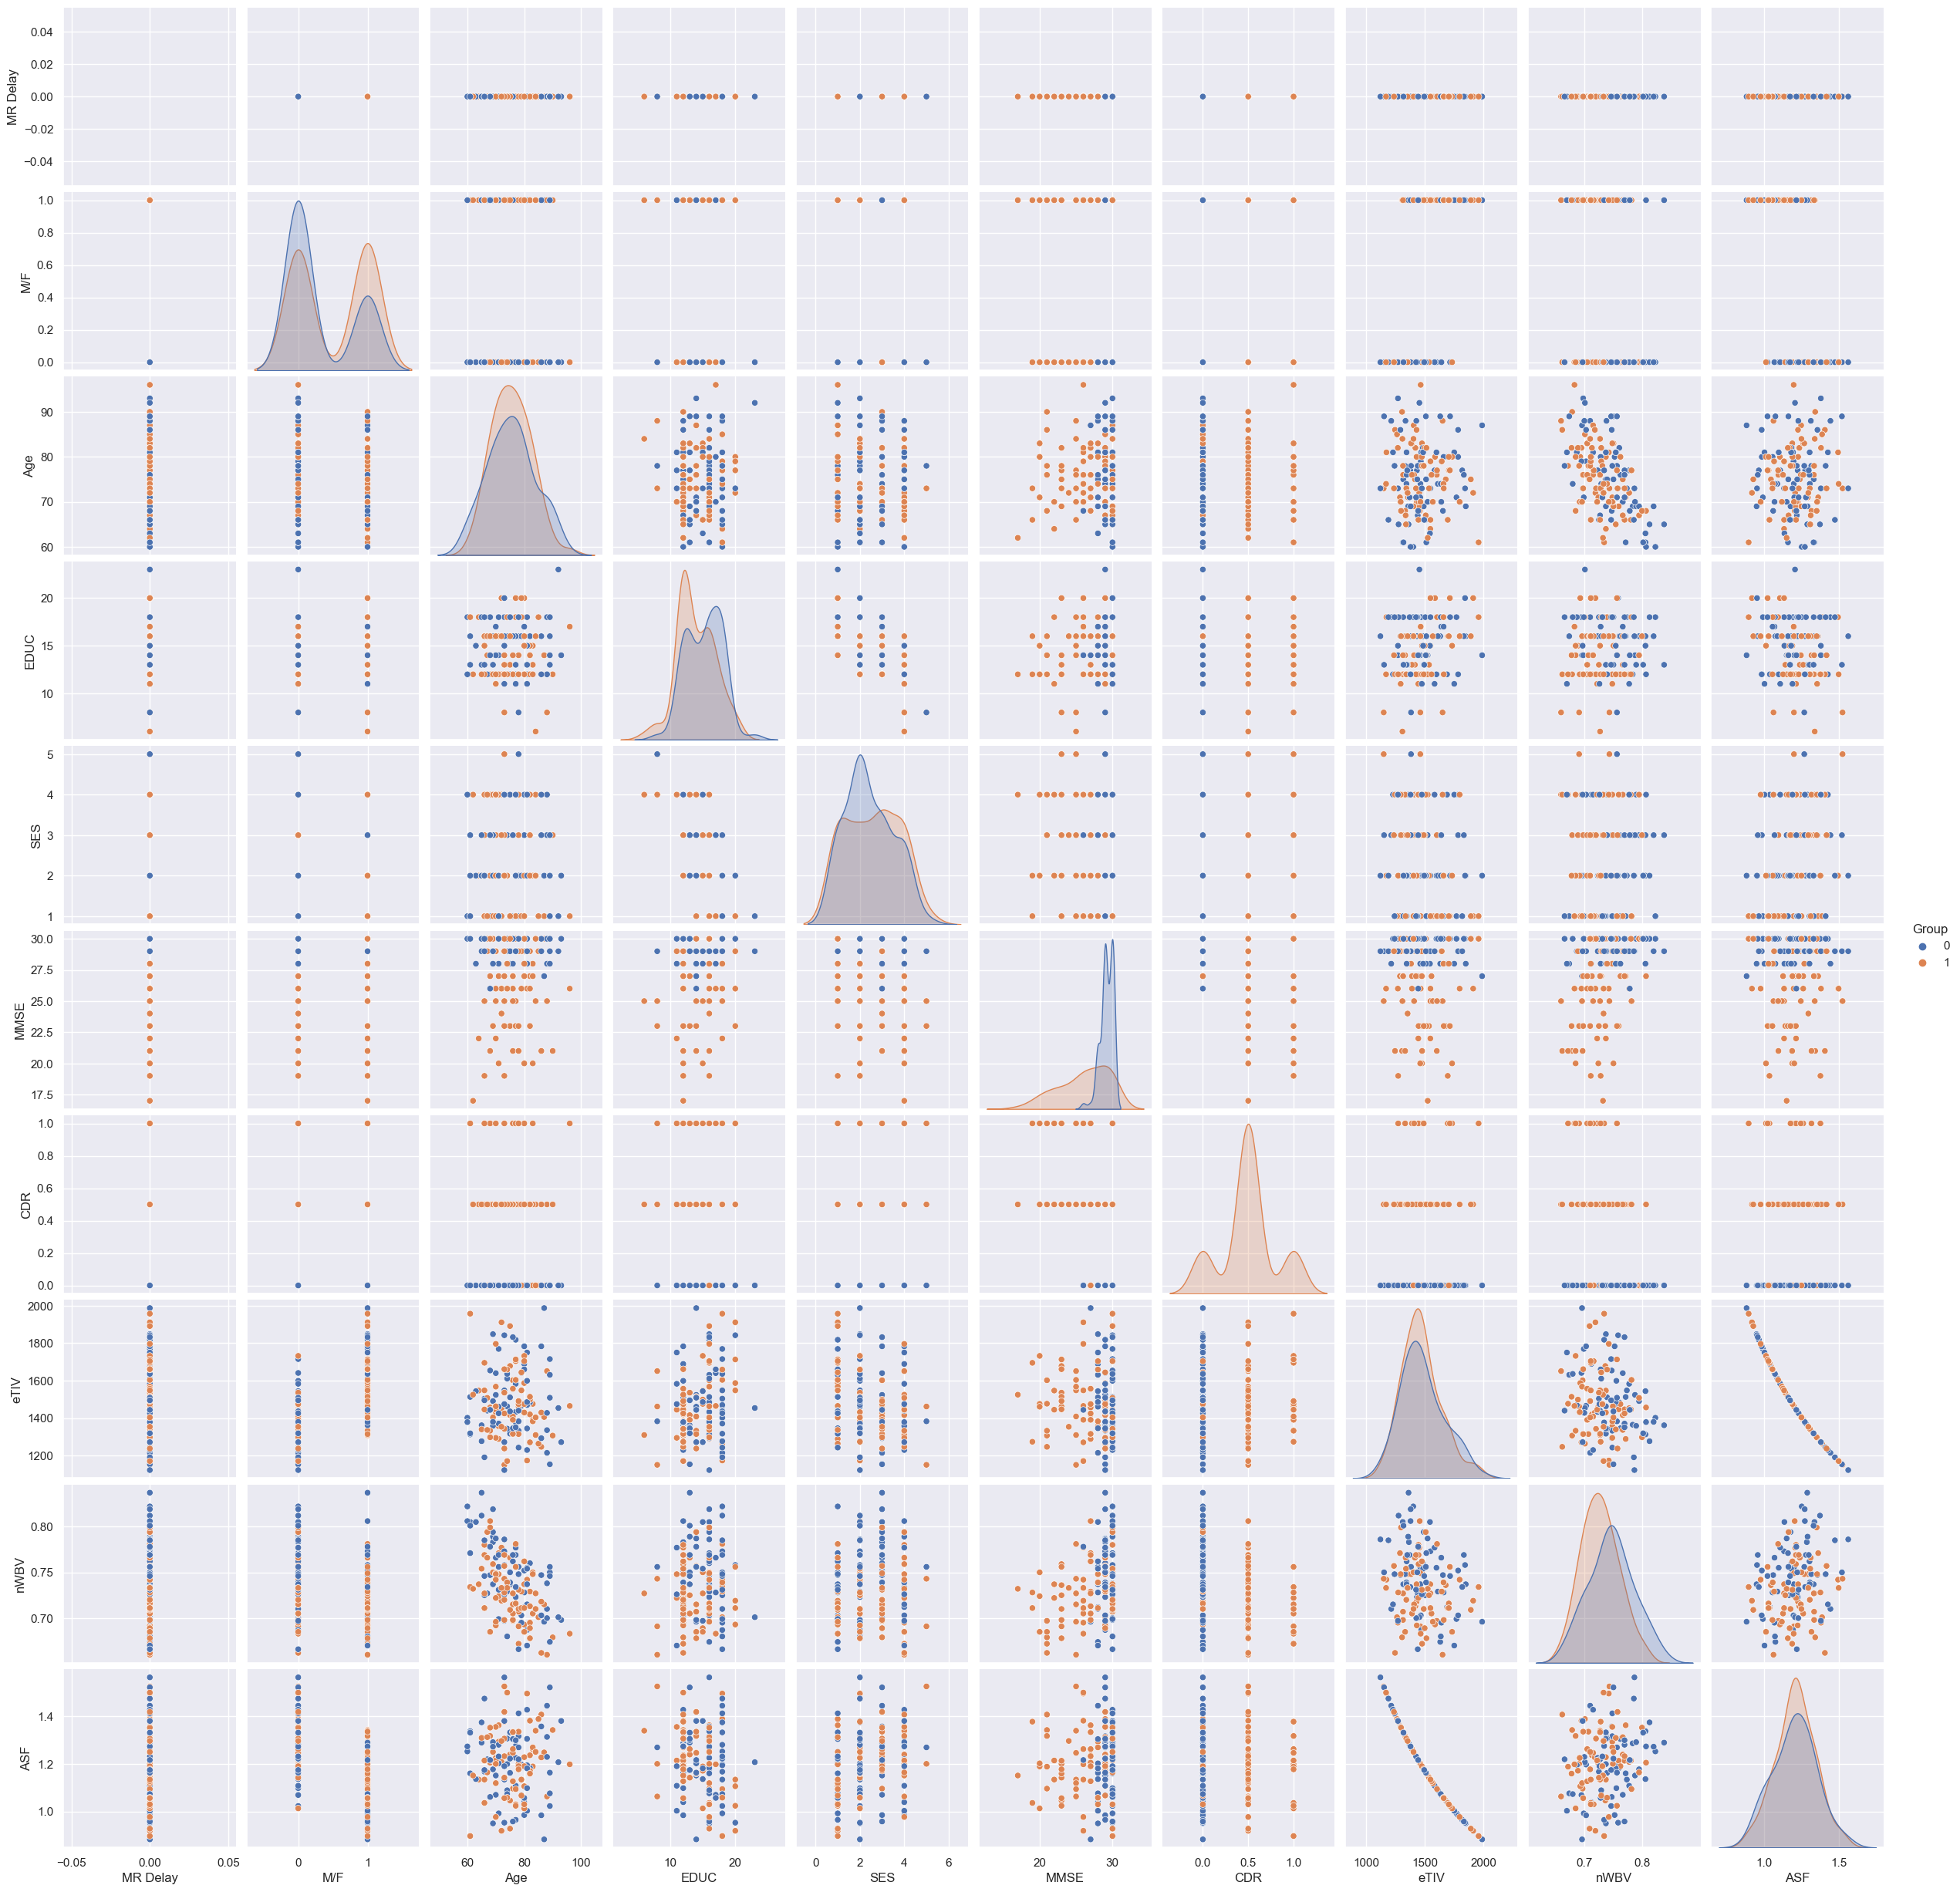

In [ ]:
sns.pairplot(df, hue='Group')

 ### 📌Heatmap to visualize the correlation between the selected features

<AxesSubplot: >

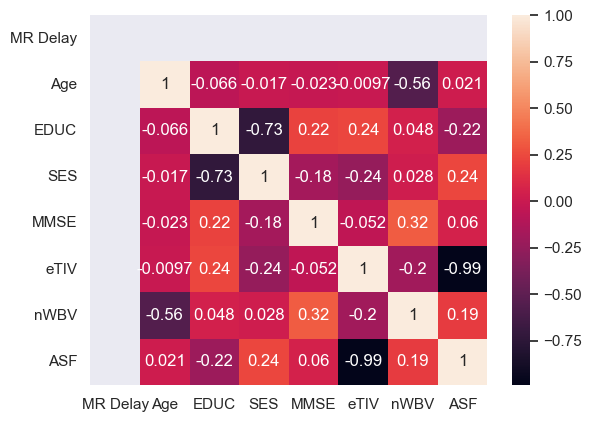

In [ ]:
sns.heatmap(df[['MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']].corr(), annot=True)
